# Image segmentation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import gray2rgb
from skimage.draw import circle_perimeter
from skimage.feature import canny
from skimage.morphology import dilation, disk
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.util import img_as_ubyte
from tifffile import imread
from tqdm.auto import tqdm

plt.rcParams["figure.figsize"] = (12, 8)

## Image loading

In [2]:
imgs_file = "../data/examples/img/Droplets with 10 to 4 e coli_01.tiff"

In [3]:
imgs = imread(imgs_file)

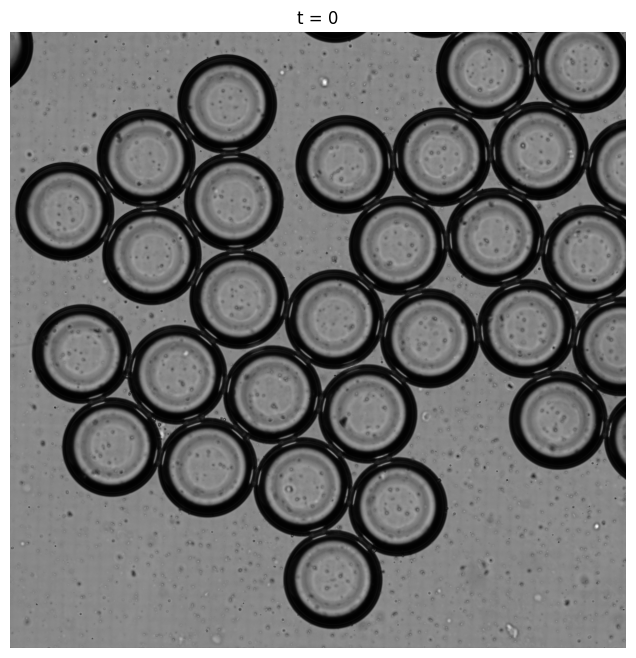

In [4]:
t = 0
plt.title(f"t = {t}")
plt.imshow(imgs[t], cmap="gray")
plt.axis("off")
plt.show()

## Edge detection

In [5]:
canny_sigma = 5

In [6]:
edges = np.array([canny(img, sigma=canny_sigma) for img in tqdm(imgs)])

  0%|          | 0/21 [00:00<?, ?it/s]

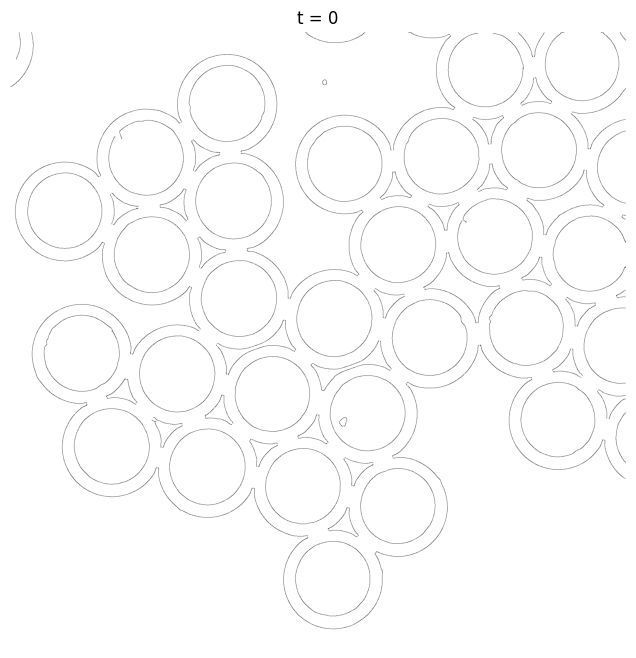

In [7]:
t = 0
plt.title(f"t = {t}")
plt.imshow(edges[t], cmap="gray_r")
plt.axis("off")
plt.show()

## Circular Hough transform

In [8]:
hough_radii = np.arange(150, 160, 1)

In [9]:
hs = np.array([hough_circle(edge, hough_radii) for edge in tqdm(edges)])

  0%|          | 0/21 [00:00<?, ?it/s]

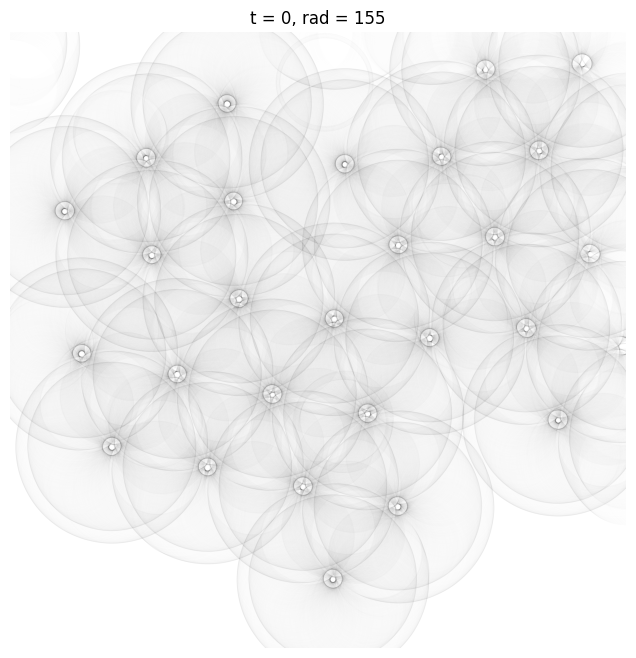

In [10]:
t = 0
r = len(hough_radii) // 2
plt.title(f"t = {t}, rad = {hough_radii[r]}")
plt.imshow(hs[t, r], cmap="gray_r")
plt.axis("off")
plt.show()

## Circular Hough peak detection

In [11]:
min_dist = 200

In [12]:
accums = []
cxs = []
cys = []
rads = []
for h in tqdm(hs):
    accum, cx, cy, rad = hough_circle_peaks(
        h,
        hough_radii,
        min_xdistance=min_dist,
        min_ydistance=min_dist,
        normalize=True,
    )
    accums.append(accum)
    cxs.append(cx)
    cys.append(cy)
    rads.append(rad)

  0%|          | 0/21 [00:00<?, ?it/s]

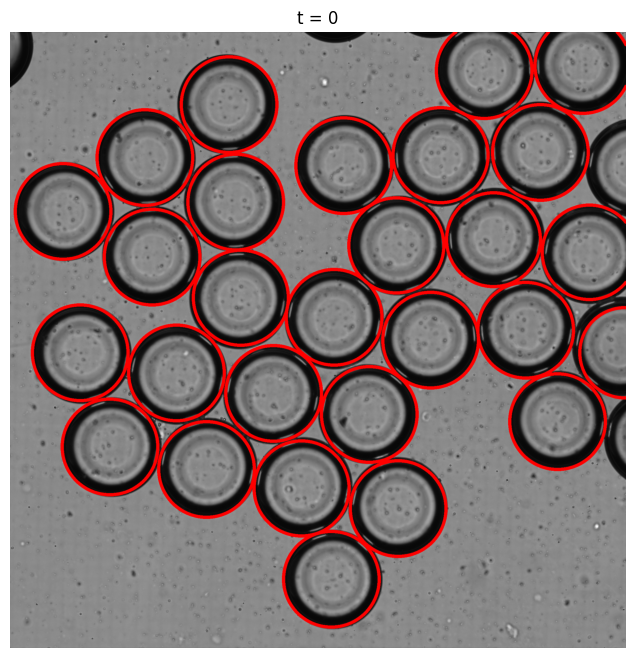

In [13]:
t = 0
plt.title(f"t = {t}")
img = gray2rgb(img_as_ubyte(imgs[t]))
for cx, cy, rad in zip(cxs[t], cys[t], rads[t]):
    circle_img = np.zeros(img.shape[:-1], dtype=np.uint8)
    circle_ys, circle_xs = circle_perimeter(cy, cx, rad, shape=circle_img.shape)
    circle_img[circle_ys, circle_xs] = 1
    circle_img = dilation(circle_img, disk(radius=5))
    img[circle_img != 0] = (255, 0, 0)
plt.imshow(img)
plt.axis("off")
plt.show()